In [1]:
import pandas as pd
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import pydotplus
import graphviz

from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import tree
from IPython.display import Image
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.svm import SVC, SVR

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
sns.set_style('white')
data = pd.read_csv('C://duh/Thinkful/Thinkful/CapstoneResearch/GeneratedAgents.csv')

# Naive Bayes

In [3]:
bnb_X = data.drop(['is_current_threat', 'prob_threat'], 1)
bnb_Y = data['is_current_threat']
bnb = BernoulliNB()
bnb.fit(bnb_X, bnb_Y)
bnb_y_pred = bnb.predict(bnb_X)
print("Number of mislabeled points out of a total {} points : {}".format(
    bnb_X.shape[0],
    (bnb_Y != bnb_y_pred).sum()
))
print('Confusion Matrix:\n', confusion_matrix(bnb_Y, bnb_y_pred))
bnb_X_train, bnb_X_test, bnb_y_train, bnb_y_test = train_test_split(bnb_X, bnb_Y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(bnb_X_train, bnb_y_train).score(bnb_X_test, bnb_y_test)))
print('Testing on Sample: ' + str(bnb.fit(bnb_X, bnb_Y).score(bnb_X, bnb_Y)))
print('R^2 Score: ' + str(bnb.score(bnb_X, bnb_Y)))
print('Cross Validation:\n',cross_val_score(bnb, bnb_X, bnb_Y, cv=10))

Number of mislabeled points out of a total 10000 points : 348
Confusion Matrix:
 [[9652    0]
 [ 348    0]]
With 20% Holdout: 0.972
Testing on Sample: 0.9652
R^2 Score: 0.9652
Cross Validation:
 [0.96503497 0.96503497 0.965      0.965      0.965      0.965
 0.965      0.965      0.96596597 0.96596597]


# Linear Regression

In [4]:
lin_X = data.drop(['is_current_threat', 'prob_threat'], 1)
lin_Y = data['is_current_threat'] 
#lin_Y = data['prob_threat']
lin_regr = linear_model.LinearRegression()
lin_regr.fit(lin_X, lin_Y)
print('Coefficients:\n', lin_regr.coef_)
print('Intercept: ' + str(lin_regr.intercept_))
print('R^2 score:', lin_regr.score(lin_X, lin_Y))
print('Cross Validation:\n', cross_val_score(lin_regr, lin_X, lin_Y, cv=10))

Coefficients:
 [2.61999599e-04 5.68286200e-03 9.72117743e-03 4.77386271e-04
 1.91972359e-02 3.49459448e-02 2.90189520e-02 2.83528652e-01
 9.18421891e-02]
Intercept: -0.15974594762071603
R^2 score: 0.15044263220731102
Cross Validation:
 [0.12785398 0.11484667 0.10243405 0.14184422 0.17976062 0.1823538
 0.17741165 0.1658582  0.08480788 0.1287907 ]


# K-Nearest Neighbor Classifier, k=5 weighted

In [5]:
knn_X = data.drop(['is_current_threat', 'prob_threat'], 1)
knn_Y = data['is_current_threat']
knn_class = neighbors.KNeighborsClassifier(n_neighbors = 5, weights='distance')
knn_class.fit(knn_X, knn_Y)

print('R^2 Score: ' + str(knn_class.score(knn_X, knn_Y)))
print('Cross Validation:\n', cross_val_score(knn_class, knn_X, knn_Y, cv=10))

R^2 Score: 1.0
Cross Validation:
 [0.96603397 0.96603397 0.967      0.964      0.965      0.966
 0.97       0.962      0.96896897 0.96596597]


# K-Nearest Neighbor Regression, k=5 weighted

In [6]:
knn_regr = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_regr_Y = data['prob_threat']
knn_regr.fit(knn_X, knn_regr_Y)

print('R^2 Score: ' + str(knn_regr.score(knn_X, knn_regr_Y)))
print('Cross Validation:\n', cross_val_score(knn_regr, knn_X, knn_regr_Y, cv=10))

R^2 Score: 1.0
Cross Validation:
 [-0.17730328 -0.19139791 -0.16102924 -0.2048769  -0.13992186 -0.13196838
 -0.13966355 -0.1911263  -0.20648496 -0.14404514]


# Decision Tree Classifier, max_features=3, max_depth=5

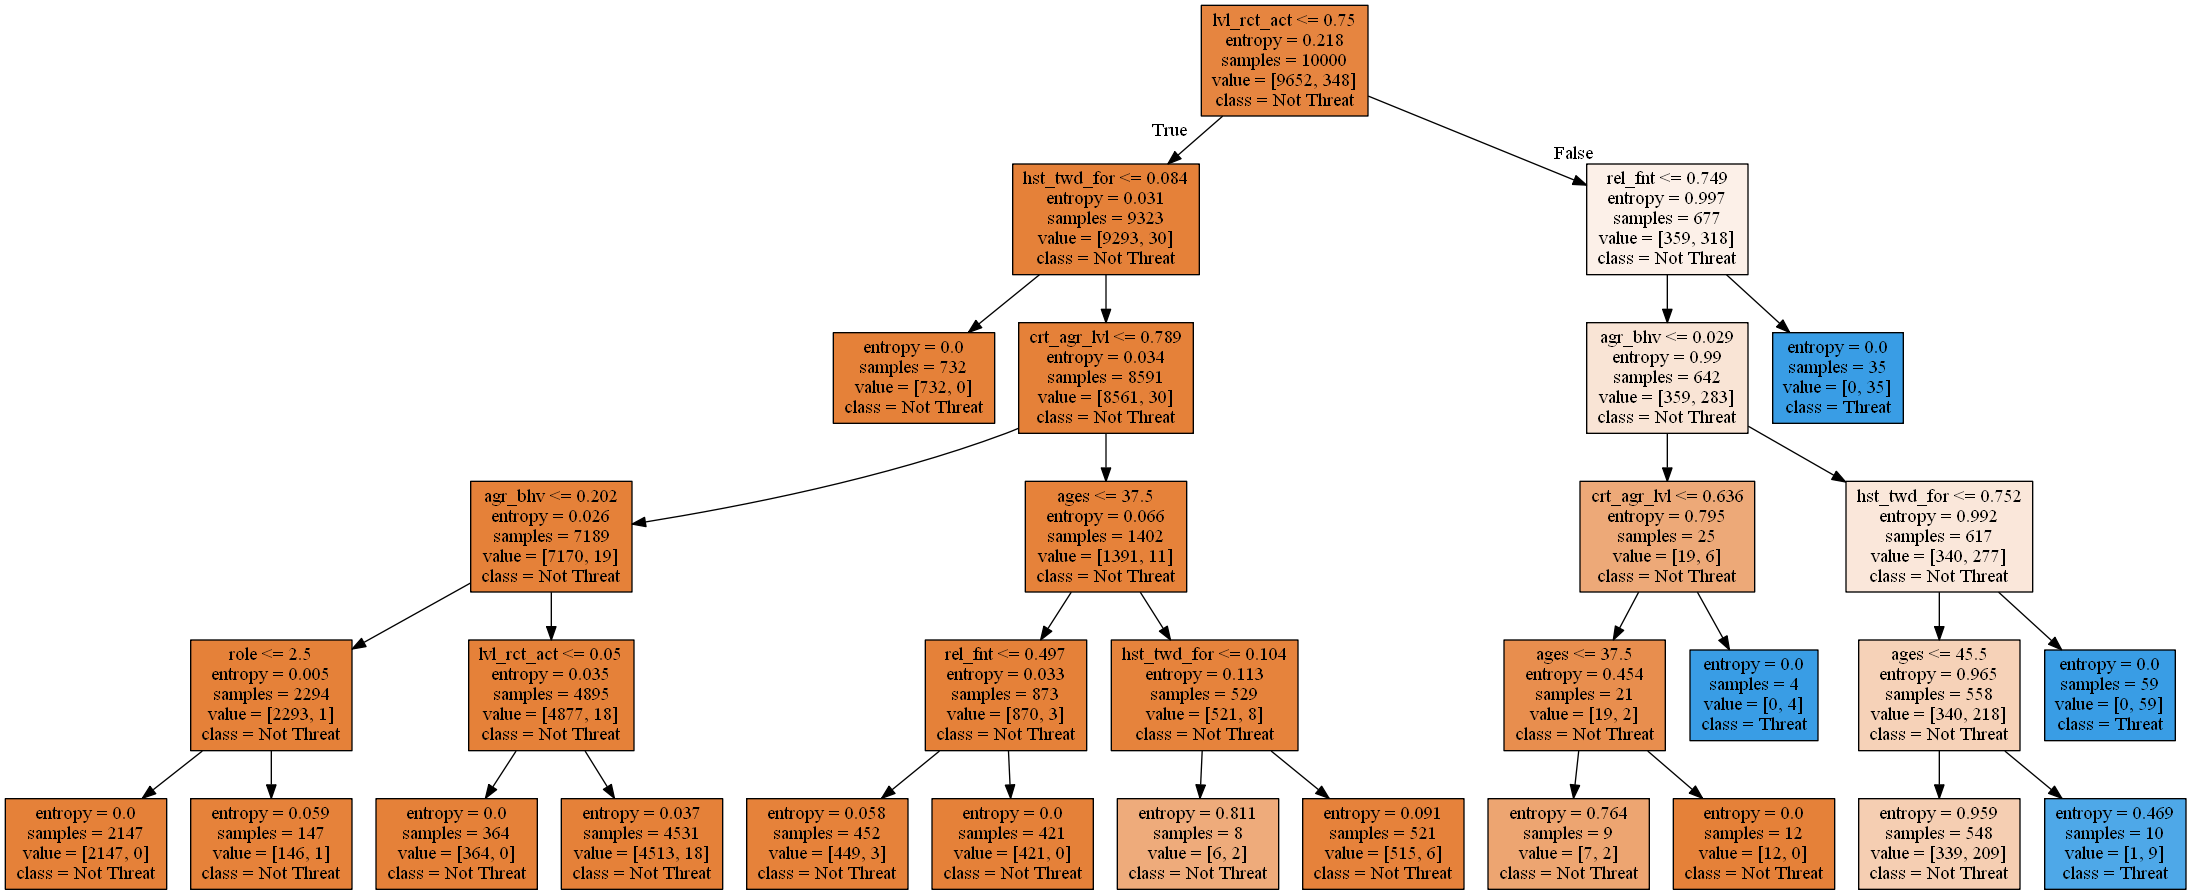

In [7]:
tree_X = data.drop(['is_current_threat', 'prob_threat'], 1)
tree_class_Y = data['is_current_threat']

class_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=3,
    max_depth=5
)

class_tree.fit(tree_X, tree_class_Y)

dot_data = tree.export_graphviz(
    class_tree, out_file=None,
    feature_names=tree_X.columns,
    class_names=['Not Threat', 'Threat'],
    filled=True,
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [9]:
print('R^2 Score: ' + str(class_tree.score(tree_X, tree_class_Y)))
print('Cross Validation:\n', cross_val_score(class_tree, tree_X, tree_class_Y, cv=10))

R^2 Score: 0.9758
Cross Validation:
 [0.99000999 0.96903097 0.995      0.974      0.966      0.996
 0.992      0.966      0.96796797 0.99299299]


# Decision Tree Regression, max_depth=5

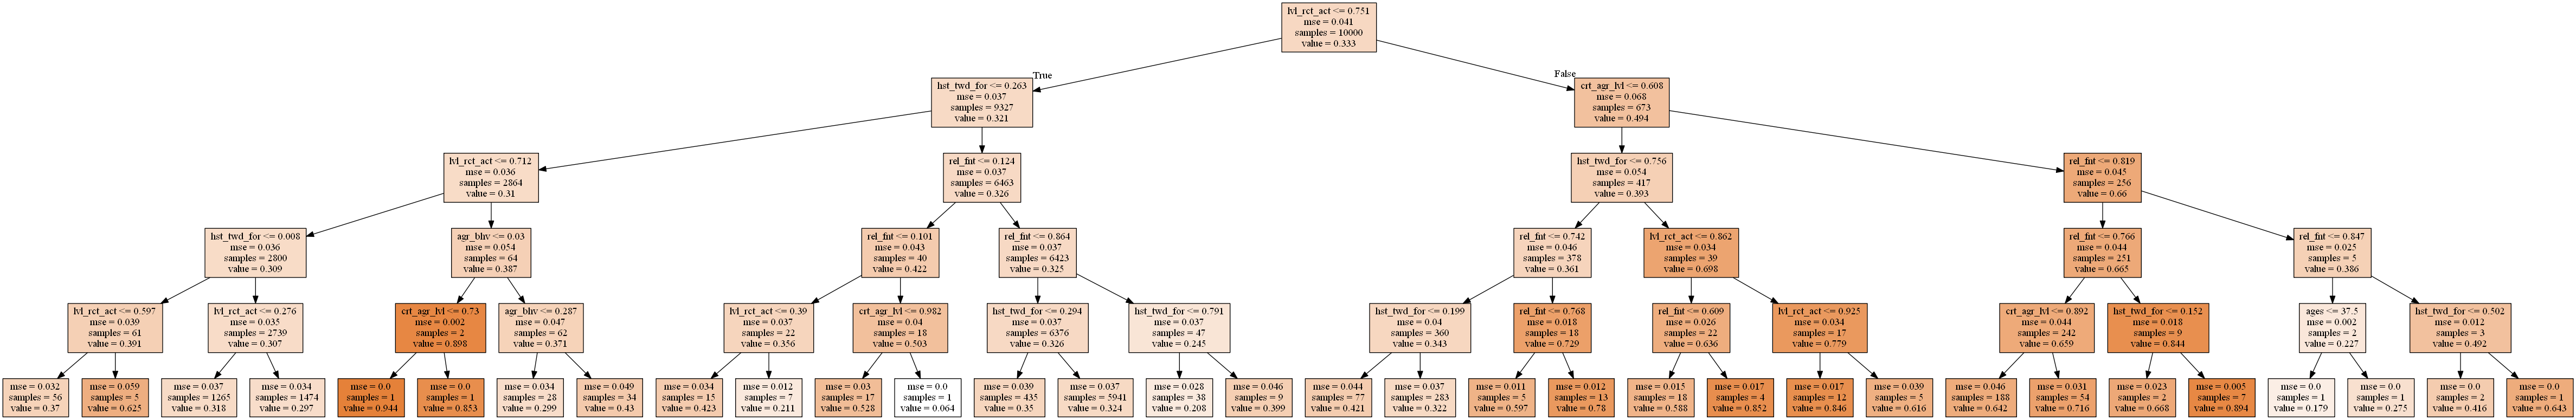

In [10]:
tree_regr_Y = data['prob_threat']

regr_tree = tree.DecisionTreeRegressor(max_depth=5)
regr_tree.fit(tree_X, tree_regr_Y)

dot_data = tree.export_graphviz(
    regr_tree, out_file=None,
    feature_names=tree_X.columns,
    class_names=['Not Threat', 'Threat'],
    filled=True,
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [11]:
print('R^2:\n', regr_tree.score(tree_X, tree_regr_Y))
print('Cross Validation:\n', cross_val_score(regr_tree, tree_X, tree_regr_Y, cv=10))

R^2:
 0.10638474392557162
Cross Validation:
 [0.07596425 0.08156617 0.05491137 0.07792612 0.09331585 0.07622773
 0.10851576 0.0796328  0.01818354 0.06758685]


# Random Forest Classifier

In [12]:
rfc_X = data.drop(['is_current_threat', 'prob_threat'], 1)
rfc_Y = data['is_current_threat']
rfc = ensemble.RandomForestClassifier()
rfc.fit(rfc_X, rfc_Y)

print('R^2 Score: ' + str(rfc.score(rfc_X, rfc_Y)))
print('Cross Validation:\n', cross_val_score(rfc, rfc_X, rfc_Y, cv=10))

R^2 Score: 0.9994
Cross Validation:
 [0.995005   0.996004   0.998      0.998      0.998      0.996
 0.997      0.995      0.99399399 0.99499499]


# Random Forest Regression

In [13]:
rfg_X = data.drop(['is_current_threat', 'prob_threat'], 1)
rfg_Y = data['prob_threat']
rfg = ensemble.RandomForestRegressor()
rfg.fit(rfg_X, rfg_Y)

print('R^2 Score: ' + str(rfg.score(rfg_X, rfg_Y)))
print('Cross Validation:\n', cross_val_score(rfg, rfg_X, rfg_Y, cv=10))

R^2 Score: 0.8128916733540221
Cross Validation:
 [-0.01124747 -0.02283092 -0.09071961 -0.05935058 -0.0455511  -0.0485169
 -0.02537376 -0.02523813 -0.10760831 -0.02641282]


# Logistic Regression

In [14]:
log_X = data.drop(['is_current_threat', 'prob_threat'], 1)
log_Y = data['is_current_threat']
lr = LogisticRegression(C=1e9)
lr.fit(log_X, log_Y)

print('R^2 Score:\n', lr.score(log_X, log_Y))
print('Cross Validation:\n', cross_val_score(lr, log_X, log_Y, cv=10))

R^2 Score:
 0.9786
Cross Validation:
 [0.97902098 0.97802198 0.979      0.979      0.979      0.977
 0.983      0.972      0.97297297 0.97497497]


# Ridge Regression, alpha=10

In [15]:
ridge_X = data.drop(['is_current_threat', 'prob_threat'], 1)
ridge_Y = data['prob_threat']
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregr.fit(ridge_X, ridge_Y)

print('R^2 Score:\n', ridgeregr.score(ridge_X, ridge_Y))
print('Cross Validation:\n', cross_val_score(ridgeregr, ridge_X, ridge_Y, cv=10))

R^2 Score:
 -0.004121336874850057
Cross Validation:
 [-0.0038972  -0.01795659 -0.00790617 -0.01471536  0.01063874  0.0016607
  0.02843491 -0.0108022  -0.0373867  -0.01961046]


# Lasso Regression, alpha=.35

In [16]:
lasso_X = data.drop(['is_current_threat', 'prob_threat'], 1)
lasso_Y = data['prob_threat']
lassoregr = linear_model.Lasso(alpha=.35)
lassoregr.fit(lasso_X, lasso_Y)

print('R^2 Score:\n', lassoregr.score(lasso_X, lasso_Y))
print('Cross Validation:\n', cross_val_score(lassoregr, lasso_X, lasso_Y, cv=10))

R^2 Score:
 0.0
Cross Validation:
 [-2.10017155e-03 -1.45745243e-03 -1.82607411e-03 -3.17817886e-03
 -4.96403093e-05 -7.18657486e-04 -2.62909495e-04 -4.20726561e-05
 -1.62566493e-03 -5.90900766e-04]


# Support Vector Classifier, kernal=linear

In [17]:
svc_X = data.drop(['is_current_threat', 'prob_threat'], 1)
svc_Y = data['is_current_threat']
svm = SVC(kernel = 'linear')
svm.fit(svc_X, svc_Y)

print('R^2 Score: ' + str(svm.score(svc_X, svc_Y)))
print('Cross Validation:\n', cross_val_score(svm, svc_X, svc_Y, cv=10))

R^2 Score: 0.9748
Cross Validation:
 [0.97502498 0.97602398 0.974      0.972      0.979      0.974
 0.978      0.974      0.97397397 0.97697698]


# Support Vector Regression, gamma=auto

In [18]:
svr_X = data.drop(['is_current_threat', 'prob_threat'], 1)
svr_Y = data['prob_threat']
svr = SVR(gamma='auto')
svr.fit(svr_X, svr_Y)

print('R^2 Score: ' + str(svr.score(svr_X, svr_Y)))
print('Cross Validation:\n', cross_val_score(svr, svr_X, svr_Y, cv=10))

R^2 Score: 0.05945524638259769
Cross Validation:
 [-0.02338242 -0.00844067 -0.02866383 -0.02022128  0.01086814  0.03243095
  0.0059621   0.00396466 -0.03162783 -0.00933117]


# Boosted Classifier; loss=deviance, n_estimators=500, max_depth=5

In [28]:
clf_X = data.drop(['is_current_threat', 'prob_threat'], 1)
clf_class_Y = data['is_current_threat']
params = {'loss': 'deviance', 'n_estimators':500, 'max_depth':10}
clf_class = ensemble.GradientBoostingClassifier(**params)
clf_class.fit(clf_X, clf_class_Y)

print('R^2 Score: ' + str(clf_class.score(clf_X, clf_class_Y)))
print('Cross Validation:\n', cross_val_score(clf_class, clf_X, clf_class_Y, cv=10))

R^2 Score: 1.0
Cross Validation:
 [0.995005   0.996004   0.998      0.997      0.999      0.997
 0.998      0.996      0.99399399 0.99499499]


# Boosted Regression; loss=ls, learning_rate=.1, n_estimators=500, max_depth=10

In [27]:
clf_regr_Y = data['prob_threat']
params = {'loss': 'ls', 'learning_rate': .1, 'n_estimators': 500, 'max_depth': 10}

clf_regr = ensemble.GradientBoostingRegressor(**params)
clf_regr.fit(clf_X, clf_regr_Y)

print('R^2 Score: ' + str(clf_regr.score(clf_X, clf_regr_Y)))
print('Cross Validation:\n', cross_val_score(clf_regr, clf_X, clf_regr_Y, cv=10))

R^2 Score: 0.979610579952091
Cross Validation:
 [-0.06587823 -0.1295143  -0.08476089 -0.05109249 -0.10369568 -0.10909515
 -0.08495881 -0.05362799 -0.16281166 -0.03144705]
